In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [116]:
result_file = '../exp_results/2024_08_28_17_53_16.txt'
with open(result_file, 'r') as f:
    lines = f.readlines()

actual_thetas = []
predicted_thetas = []
throttles = []
for l in lines:
    if 'Actual' in l:
        actual = l.split(',')[1:]
        actual = [float(a) for a in actual]
        actual_thetas.append(actual)
    if 'Predicted' in l:
        predicted = l.split(',')[1:]
        predicted = [float(a) for a in predicted]
        predicted_thetas.append(predicted)
    if 'Throttle' in l:
        throttle = l.split(',')[1:]
        throttle = [float(a) for a in throttle]
        throttles.append(throttle)

actual_thetas = np.array(actual_thetas)
predicted_thetas = np.array(predicted_thetas)
throttles = np.array(throttles)

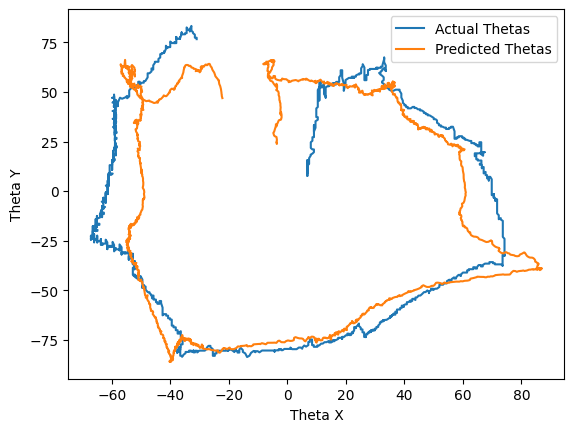

In [118]:
plt.plot(actual_thetas[:, 0], actual_thetas[:, 1], label='Actual Thetas')
plt.xlabel('Theta X')
plt.ylabel('Theta Y')
plt.plot(predicted_thetas[:, 0]-10, predicted_thetas[:, 1]+20, label='Predicted Thetas')
plt.legend()

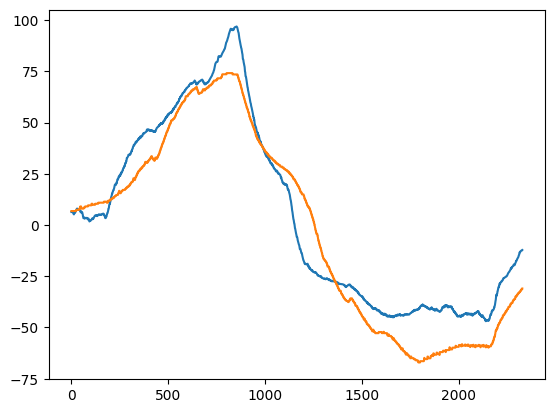

In [100]:
plt.plot(np.arange(len(predicted_thetas)), predicted_thetas[:, 0]-10, label='x')
plt.plot(np.arange(len(actual_thetas)), actual_thetas[:, 0], label='y')

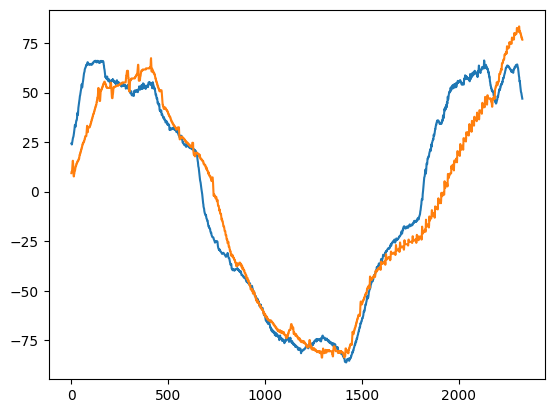

In [101]:
plt.plot(np.arange(len(predicted_thetas)), predicted_thetas[:, 1] + 20, label='x')
plt.plot(np.arange(len(actual_thetas)), actual_thetas[:, 1], label='y')

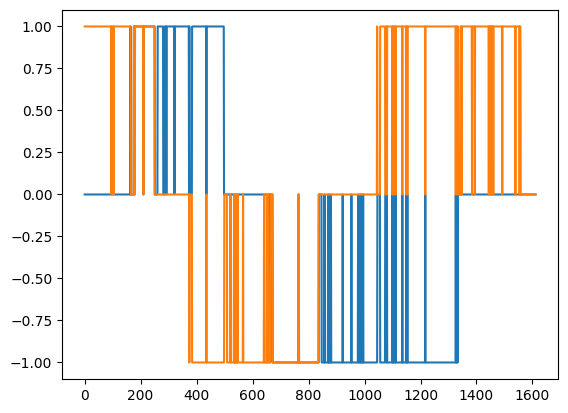

In [87]:
plt.plot(np.arange(len(throttles)), throttles[:, 0])
plt.plot(np.arange(len(throttles)), throttles[:, 1])

In [111]:
np.sqrt(np.mean((actual_thetas[:, 2:] - predicted_thetas[:, 2:])**2))

np.float64(273.72354288839)

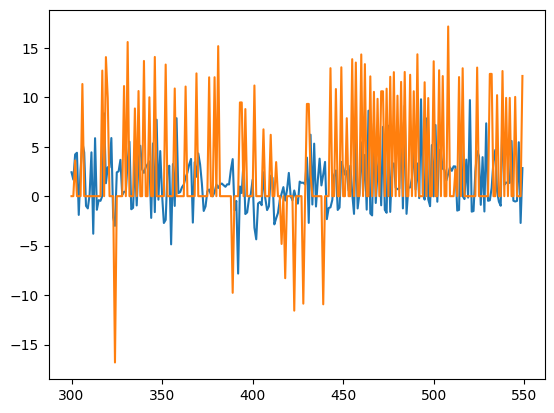

In [114]:
plt.plot(np.arange(len(predicted_thetas))[300:550], predicted_thetas[300:550, 2])
plt.plot(np.arange(len(actual_thetas))[300:550], actual_thetas[300:550, 2])

In [103]:
vel_from_pos = np.diff(predicted_thetas[:, :2], axis=0)
pred_state = np.concatenate([predicted_thetas[:-1, :2], vel_from_pos], axis=1)
np.sqrt(np.mean((actual_thetas[:-1, 2:] - pred_state[:, 2:])**2))

np.float64(273.7898414582535)

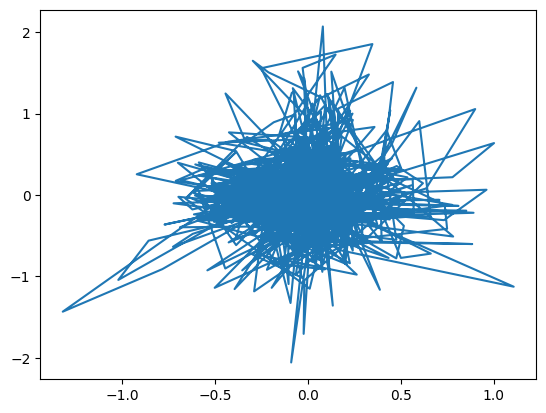

In [17]:
plt.plot(pred_state[:, 2], pred_state[:, 3], label='Predicted Thetas from Vel')

In [18]:
all_data_raw = np.concatenate([actual_thetas, predicted_thetas, throttles], axis=1)
all_data_from_vel = np.concatenate([actual_thetas[:-1], pred_state, throttles[:-1]], axis=1)
df_all_data_raw = pd.DataFrame(all_data_raw, columns=['Actual Theta X', 'Actual Theta Y', 'Actual Theta X Vel', 'Actual Theta Y Vel', 'Predicted Theta X', 'Predicted Theta Y', 'Predicted Theta X Vel', 'Predicted Theta Y Vel', 'Throttle X', 'Throttle Y'])
df_all_data_from_vel = pd.DataFrame(all_data_from_vel, columns=['Actual Theta X', 'Actual Theta Y', 'Actual Theta X Vel', 'Actual Theta Y Vel', 'Predicted Theta X', 'Predicted Theta Y', 'Predicted Theta X Vel', 'Predicted Theta Y Vel', 'Throttle X', 'Throttle Y'])


In [19]:
df_all_data_raw = df_all_data_raw[(np.abs(df_all_data_raw['Actual Theta X Vel']) < 150) & (np.abs(df_all_data_raw['Actual Theta Y Vel']) < 150) & (np.abs(df_all_data_raw['Predicted Theta X Vel']) < 150) & (np.abs(df_all_data_raw['Predicted Theta Y Vel']) < 150)].dropna()
df_all_data_from_vel = df_all_data_from_vel[(np.abs(df_all_data_from_vel['Actual Theta X Vel']) < 150) & (np.abs(df_all_data_from_vel['Actual Theta Y Vel']) < 150)].dropna()

In [76]:
actual = df_all_data_raw[df_all_data_raw.columns[:4]].values
predicted = df_all_data_raw[df_all_data_raw.columns[4:8]].values
RMSE = np.sqrt(np.mean((actual - predicted)**2))

In [77]:
RMSE

np.float64(6.757917628678529)

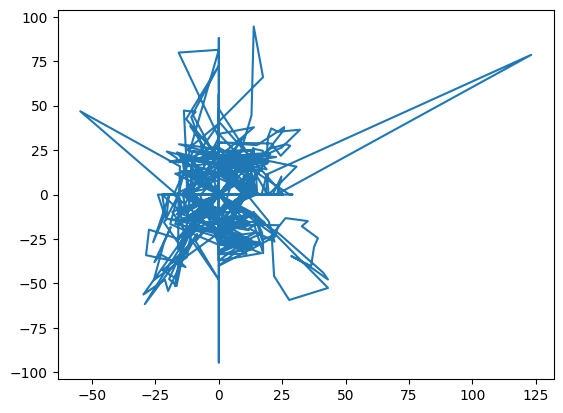

In [74]:
plt.plot(df_all_data_raw['Actual Theta X Vel'], df_all_data_raw['Actual Theta Y Vel'], label='Predicted Thetas from Vel')
